훈련용 뉴스 기사의 개수 : 2995
테스트용 뉴스 기사의 개수 :  999
훈련용 레이블의 개수 :  2995
테스트용 레이블의 개수 :  999
              precision    recall  f1-score   support

       IT/과학       0.93      0.76      0.84       237
          사회       0.78      0.90      0.83       428
       생활/문화       0.81      0.75      0.78       334

    accuracy                           0.82       999
   macro avg       0.84      0.80      0.82       999
weighted avg       0.82      0.82      0.82       999



/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/aiffel/anaconda3/en

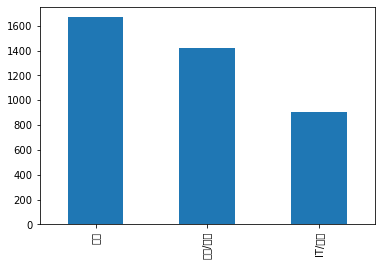

In [34]:
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import numpy as np


csv_path_1 = os.getenv("HOME") + "/아이펠실습/news_crawler/news_data.csv"
csv_path_2 = os.getenv("HOME") + "/아이펠실습/news_crawler/news_data2.csv"
df = pd.read_table(csv_path_1, sep=',')
df_2 = pd.read_table(csv_path_2, sep=',')


#아래 식은 news_data 와 news_data2 를 merge 시켜서 하나의 파일로 인식합니다.
#import os
#import glob
#import pandas as pd
#os.chdir("/home/aiffel/아이펠실습/news_crawler/")
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
   #combine all files in the list
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
    #export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

#이 경우, df_3 = pd.read_table('combined_csv.csv',delimiter=',') 를 써서
#밑에서 부터 나오는 모든  df --> df_3 로 바꿔줍니다.




# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

df['code'].value_counts().plot(kind = 'bar')

from konlpy.tag import Mecab
tokenizer = Mecab()

#불용어

stopwords = ['는', '가']


def preprocessing(data):
    text_data = []

    for sentence in data:
        temp_data = []
        #- 토큰화
        temp_data = tokenizer.morphs(sentence) 
        #- 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords] 
        text_data.append(temp_data)

    text_data = list(map(' '.join, text_data))

    return text_data

text_data = preprocessing(df['news'])


#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 10)


print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))



#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.
clf = MultinomialNB().fit(X_train_tfidf, y_train)

def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))



#형태소 분석기는 Mecab(0.82) Komoran(0.81), Hannaum(0.81), Okt(0.84) (KKM 는 너무 오래걸려서 패스했습니다) 중
#정확도가 가장 높은 Okt(0.84) 를 썼습니다. - random_state = 1 을 사용


#두파일을 합쳐주는 식을 넣어서 (위참조) 한번 실행하였습니다.
